In [ ]:
# for loading/processing the images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from PIL import Image

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import tarfile

In [ ]:
tar_file_path = '/content/drive/MyDrive/Ceitec Project Data/img.tar'
extract_dir = '/content/Images/'
#Change the paths to whatever you want

os.makedirs(extract_dir, exist_ok=True)
with tarfile.open(tar_file_path, 'r') as tar:
    tar.extractall(path=extract_dir)

print(f"Contents of {tar_file_path} extracted to {extract_dir} succesfully.")

Contents of /content/drive/MyDrive/Ceitec Project Data/img.tar extracted to /content/Images/ succesfully.


In [ ]:
# Path to the directory containing images
image_dir = '/content/Images/'

# Directory where you want to save the grayscale images
grayscale_dir = '/content/GrayscaleImages/'

# Create the grayscale directory if it doesn't exist
os.makedirs(grayscale_dir, exist_ok=True)

# Iterate through each image in the directory
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        # Load the image
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)

        # Convert the image to grayscale
        grayscale_img = img.convert('L')

        # Save the grayscale image to the specified directory
        grayscale_path = os.path.join(grayscale_dir, f"grayscale_{filename}")
        grayscale_img.save(grayscale_path)

print("Grayscale conversion completed.")

Grayscale conversion completed.


In [ ]:
path = r"/content/GrayscaleImages"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
curves = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the curves list
            curves.append(file.name)

In [ ]:
# load the image as a 224x224 array
img = load_img(curves[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)

(224, 224, 3)


In [ ]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)
x = preprocess_input(reshaped_img)
x

(1, 224, 224, 3)


array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [ ]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

553467096/553467096 [==============================] - 7s 0us/step


In [ ]:
data = {}
p = r"/content/Images/Vectors"

# loop through each image in the dataset
for curve in curves:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(curve,model)
        data[curve] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

1/1 [==============================] - 1s 944ms/step


In [ ]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

In [ ]:
grayscale_images = []

# creates a ScandirIterator aliased as files
with os.scandir(grayscale_dir) as files:
    # loops through each file in the directory
    for file in files:
        if file.name.startswith('grayscale_') and file.name.endswith('.png'):
            # adds only the grayscale image files to the grayscale_images list
            grayscale_images.append(file.name)

# Extract the numeric part and convert to integers
numeric_parts = [int(os.path.splitext(image[len('grayscale_'):])[0]) for image in grayscale_images]

# Sort the numeric parts
unique_labels = sorted(numeric_parts)

# Now unique_labels contains the sorted unique numeric parts of grayscale image filenames
print(unique_labels)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [ ]:
#sanity check
unique_labels[0:25]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [ ]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=50, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

# cluster feature vectors
kmeans = KMeans(n_clusters= 3, n_init = 'auto', random_state=22)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25))
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 50 images to be shown at a time
    if len(files) > 50:
        print(f"Clipping cluster size from {len(files)} to 25")
        files = files[:25]
    # plot each image in the cluster
    num_files = len(files)
    num_rows = int(num_files ** 0.5) + 1  # Add 1 to ensure all images are shown
    num_cols = num_files // num_rows + (num_files % num_rows > 0)
    for index, file in enumerate(files):
        plt.subplot(num_rows, num_cols, index + 1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')


Clipping cluster size from 160 to 25
Clipping cluster size from 79 to 25
Clipping cluster size from 82 to 25


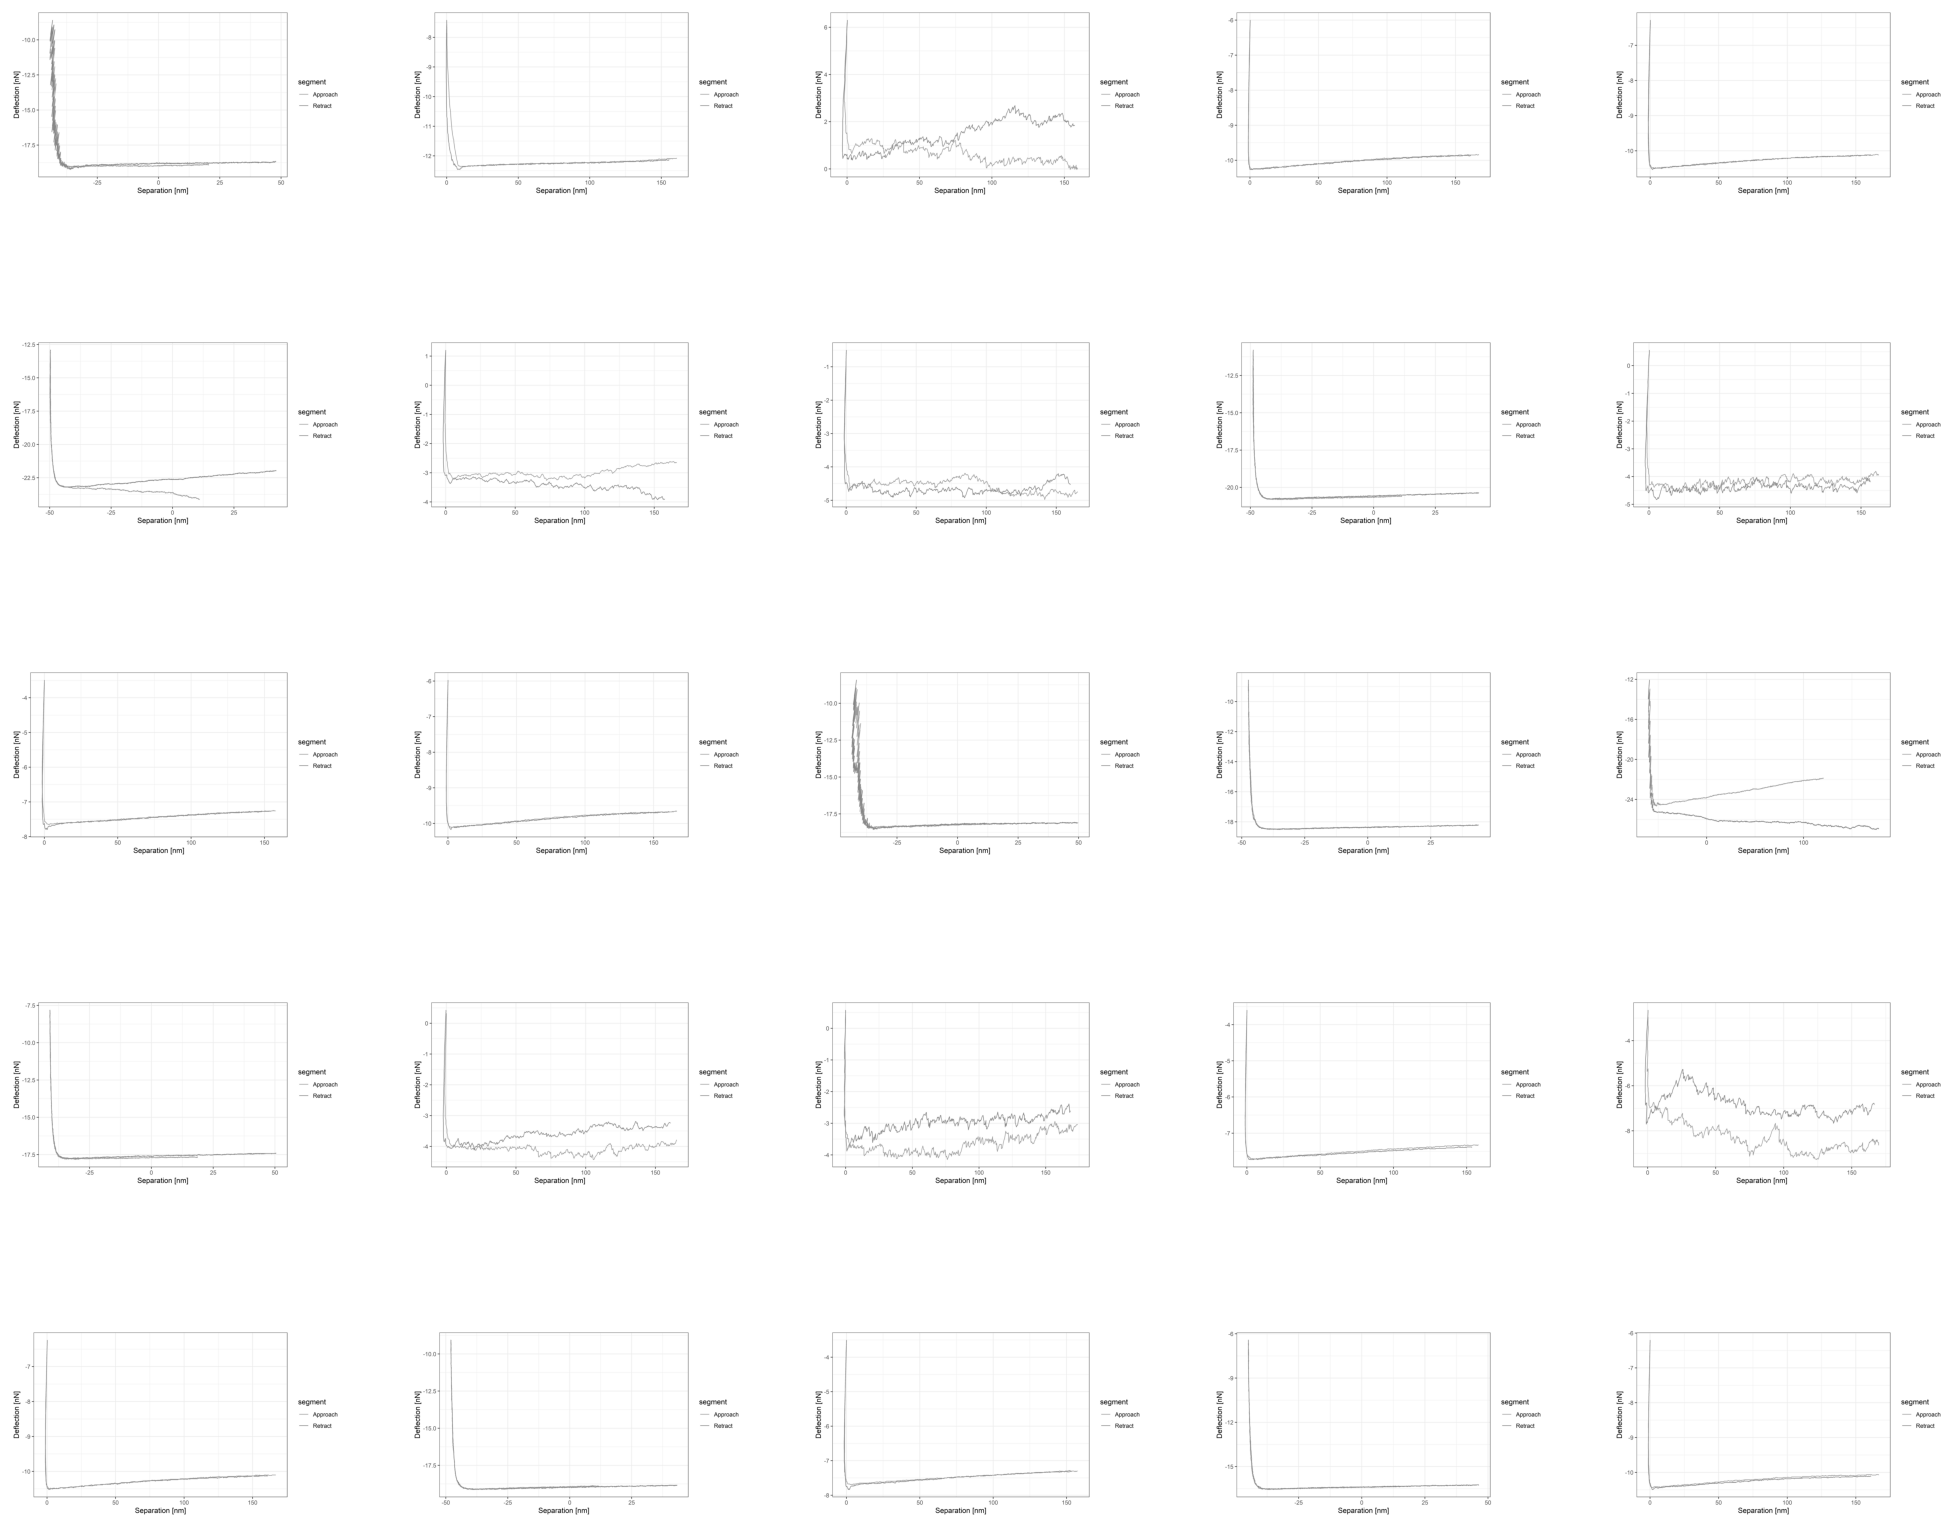

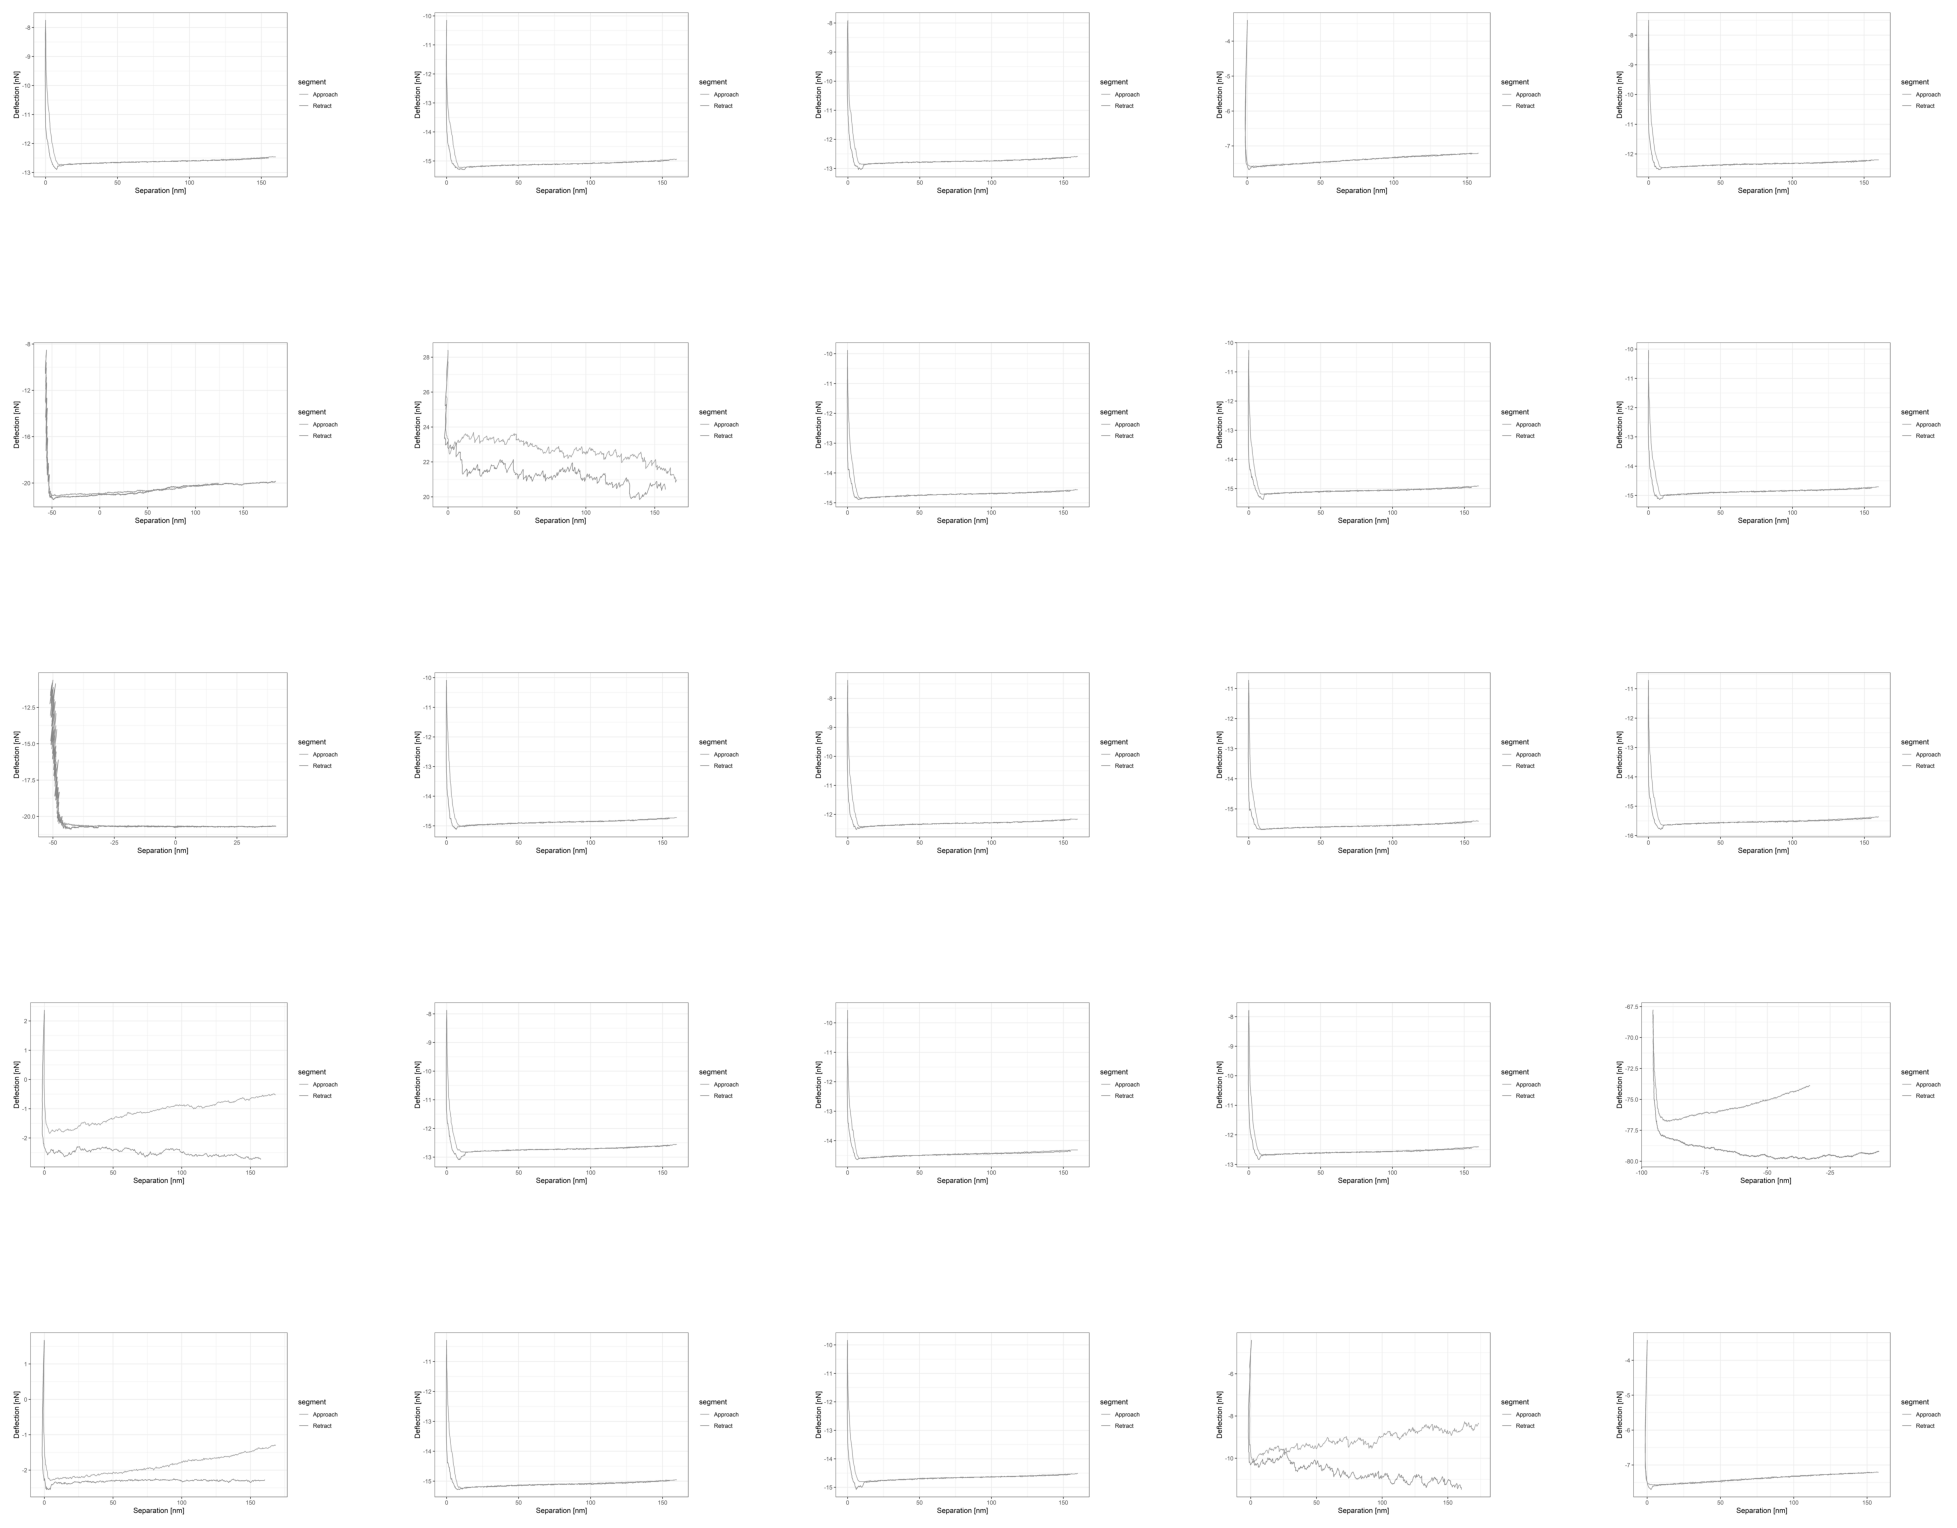

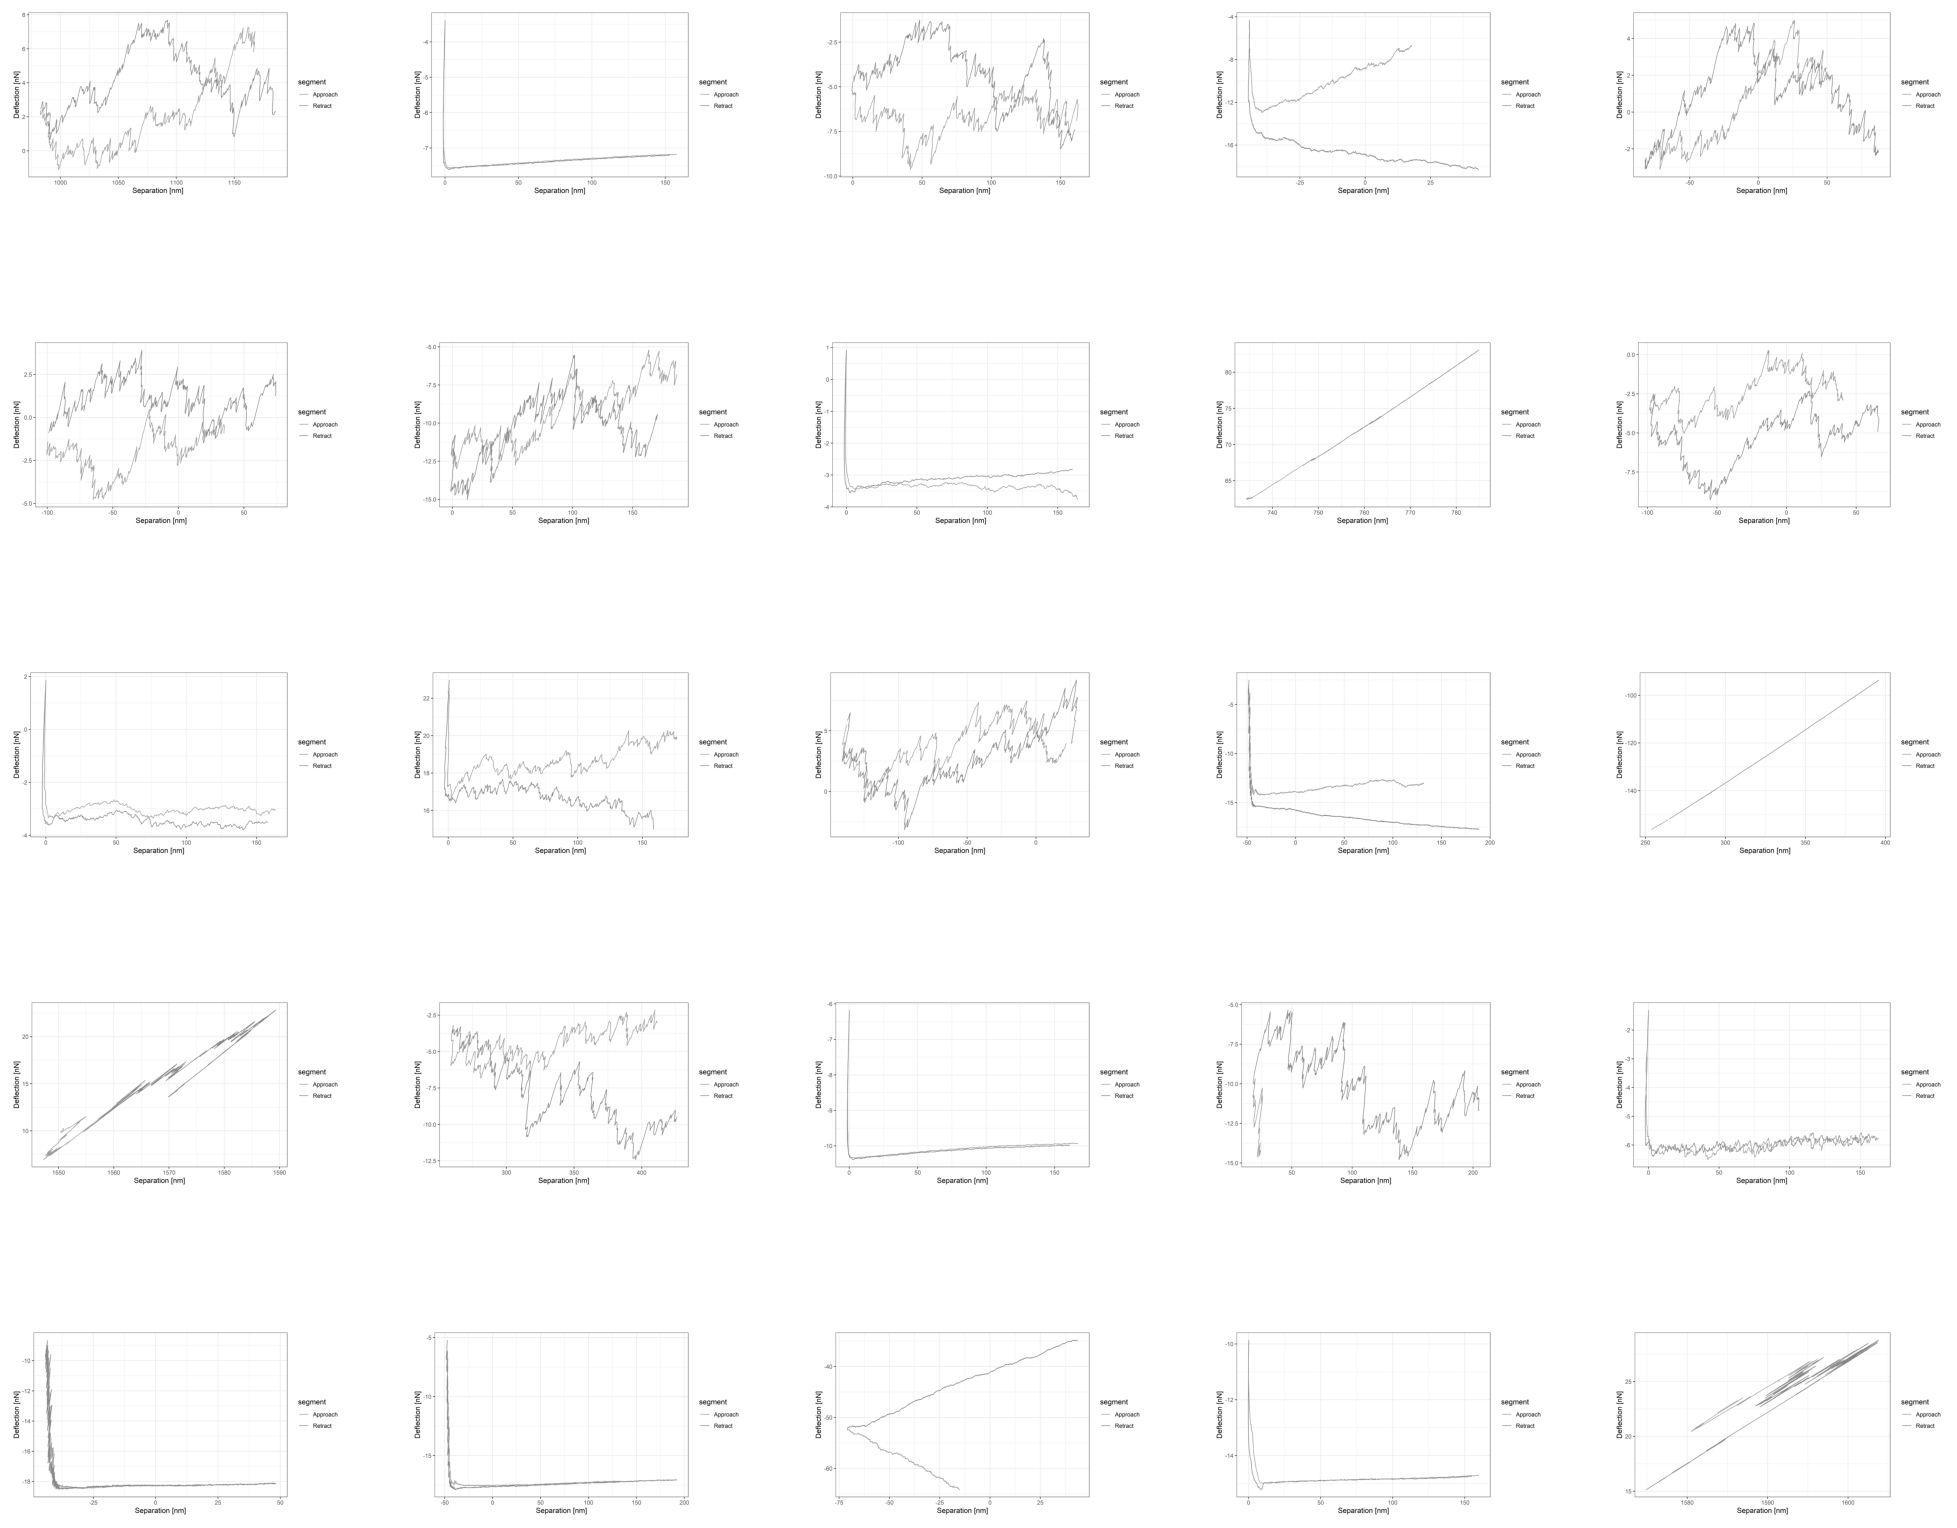

In [ ]:
for cluster in groups.keys():
    view_cluster(cluster)

plt.show()

Tož to vypadá, že odstranění barev na to mělo negativní dopad paradoxně. Pak je otázka, zdali model bere více ohled na barvy než na ten tvar křivek či jestli tam nepřekáží něco jiného. Případně nějaká chyba v labelování těch obrázků, ale tak to by snad nemuselo zase až takto zkazit.